# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS-109A Introduction to Data Science


## Lab 11: Neural Network Basics - Introduction to `tf.keras`

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, Chris Tanner<br>
**Lab Instructors:** Chris Tanner and Eleni Kaxiras.  <br>
**Authors:** Eleni Kaxiras, David Sondak, and Pavlos Protopapas. 

In [1]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
%matplotlib inline

from PIL import Image

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


#### Instructions for running `tf.keras` with Tensorflow 2.0:  

1. Create a `conda` virtual environment by cloning an existing one that you know works
```
conda create --name myclone --clone myenv
```

2. Go to [https://www.tensorflow.org/install/pip](https://www.tensorflow.org/install/pip) and follow instructions for your machine.

3. In a nutshell: 
```
pip install --upgrade pip
pip install tensorflow==2.0.0 
```

All references to Keras should be written as `tf.keras`.  For example: 

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
tf.keras.models.Sequential
tf.keras.layers.Dense, tf.keras.layers.Activation, 
tf.keras.layers.Dropout, tf.keras.layers.Flatten, tf.keras.layers.Reshape
tf.keras.optimizers.SGD
tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.regularizers
tf.keras.datasets.mnist   
```

You could avoid the long names by using
```
from tensorflow import keras
from tensorflow.keras import layers
```
These imports do not work on some systems, however, because they pick up previous versions of `keras` and `tensorflow`. That is why I avoid them in this lab.

## Learning Goals
In this lab we will understand the basics of neural networks and how to start using a deep learning library called `keras`. By the end of this lab, you should:

- Understand how a simple neural network works and code some of its functionality from scratch.
- Be able to think and do calculations in matrix notation. Also think of vectors and arrays as tensors.
- Know how to install and run `tf.keras`.
- Implement a simple real world example using a neural network.

## Part 1: Neural Networks 101

Suppose we have an input vector $X=${$x_1, x_2, ... x_L$} to a $k$-layered network. <BR><BR>
Each layer has its own number of nodes. For the first layer in our drawing that number is $J$. We can store the weights for each node in a vector $\mathbf{W} \in \mathbb{R}^{JxL+1}$ (accounting for bias).  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{I}$.  The affine transformation is then written as $$\mathbf{a} = \mathbf{W^T}X + \mathbf{b}$$ <BR>  What we then do is "absorb" $\mathbf{b}$ into $X$ by adding a column of ones to $X$. Our $X$ matrix than becomes $\mathbf{X} \in \mathbb{R}^{JxL+1}$ and our equation: <BR><BR>$$\mathbf{a} = \mathbf{W^T}_{plusones}X$$ <br>We have that $\mathbf{a} \in \mathbb{R}^{J}$ as well.  Next we evaluate the output from each node.  We write $$\mathbf{u} = \sigma\left(\mathbf{a}\right)$$ where $\mathbf{u}\in\mathbb{R}^{J}$.  We can think of $\sigma$ operating on each individual element of $\mathbf{a}$ separately or in matrix notation. If we denote each component of $\mathbf{a}$ by $a_{j}$ then we can write $$u_{j} = \sigma\left(a_{j}\right), \quad j = 1, ... J.$$<br> In our code we will implement all these equations in matrix notation.
`tf.keras` (Tensorflow) and `numpy` perform the calculations in matrix format.

![](../fig/neuralnet.pdf)
<br><br>
Image source: *"Modern Mathematical Methods for Computational Science and Engineering"* Efthimios Kaxiras and Athanassios Fokas.

Let's assume that we have 3 input points (L = 3), two hidden layers ($k=2$), and 2 nodes in each layer ($J=2$)<br>

### Input Layer

$𝑋$={$𝑥_1,𝑥_2,x_3$}

### First Hidden Layer

\begin{equation}
 \begin{aligned}
a^{(1)}_1 = w^{(1)}_{10} + w^{(1)}_{11}x_1 + w^{(1)}_{12}x_2 + w^{(1)}_{13}x_3 \\
a^{(1)}_2 = w^{(1)}_{20} + w^{(1)}_{21}x_1 + w^{(1)}_{22}x_2 + w^{(1)}_{23}x_3 \\ 
\end{aligned}
\end{equation}
<br> All this in matrix notation: $$\mathbf{a} = \mathbf{W^T}X$$
<br> NOTE: in $X$ we have added a column of ones to account for the bias<BR><BR>
**Then the sigmoid is applied**:
\begin{equation}
 \begin{aligned}
u^{(1)}_1 = \sigma(a^{(1)}_1) \\
u^{(1)}_2 = \sigma(a^{(1)}_2) \\
\end{aligned}
\end{equation}
    
or in matrix notation: $$\mathbf{u} = \sigma\left(\mathbf{a}\right)$$

### Second Hidden Layer

\begin{equation}
 \begin{aligned}
a^{(2)}_1 = w^{(2)}_{10} + w^{(2)}_{11}u^{(1)}_1 + w^{(2)}_{12}u^{(1)}_2 + w^{(2)}_{13}u^{(1)}_3 \\
a^{(2)}_2 = w^{(2)}_{20} + w^{(2)}_{21}u^{(1)}_1 + w^{(2)}_{22}u^{(1)}_2 + w^{(2)}_{23}u^{(1)}_3 \\ 
\end{aligned}
\end{equation}
<br>

**Then the sigmoid is applied**:

\begin{equation}
 \begin{aligned}
u^{(2)}_1 = \sigma(a^{(2)}_1) \\
u^{(2)}_2 = \sigma(a^{(2)}_2) \\
\end{aligned}
\end{equation}

### Output Layer

#### If the output is categorical:

For example with four classes ($M=4$): $Y$={$y_1, y_2, y_3, y_4$}, we have the affine and then the sigmoid is lastly applied: 

\begin{equation}
 \begin{aligned}
a^{(3)}_1 = w^{(3)}_{10} + w^{(3)}_{11}u^{(2)}_1 + w^{(3)}_{12}u^{(2)}_2 \\
a^{(3)}_2 = w^{(3)}_{20} + w^{(3)}_{21}u^{(2)}_1 + w^{(3)}_{22}u^{(2)}_2 \\ 
a^{(3)}_3 = w^{(3)}_{30} + w^{(3)}_{31}u^{(2)}_1 + w^{(3)}_{32}u^{(2)}_2 \\
a^{(3)}_4 = w^{(3)}_{40} + w^{(3)}_{41}u^{(2)}_1 + w^{(3)}_{42}u^{(2)}_2 \\
\end{aligned}
\end{equation}
<br>
\begin{equation}
 \begin{aligned}
y_1 = \sigma(a^{(3)}_1) \\
y_2 = \sigma(a^{(3)}_2) \\
y_3 = \sigma(a^{(3)}_3) \\
y_3 = \sigma(a^{(3)}_4) \\
\end{aligned}
\end{equation}
$\sigma$ will be softmax in the case of multiple classes and sigmoid for binary.
<BR>
    
#### If the output is a number (regression):

We have a single y as output:

\begin{equation}
 \begin{aligned}
y = w^{(3)}_{10}+ w^{(3)}_{11}u^{(2)}_1 + w^{(3)}_{12}u^{(2)}_2 + w^{(3)}_{13}u^{(2)}_3 \\
\end{aligned}
\end{equation}


#### Matrix Multiplication and constant addition

In [4]:
a = np.array([[1, 0], [0, 1], [2, 3]])
b = np.array([[4, 1, 1], [2, 2, 1]])
print(np.matrix(a))
print('------')
print(np.matrix(b))

[[1 0]
 [0 1]
 [2 3]]
------
[[4 1 1]
 [2 2 1]]


In [5]:
# both Tensorflow and numpy take care of transposing.
c = tf.matmul(a, b) # the tensorflow way
print(c)
d = np.dot(a, b) # the numpy way
print(d)

tf.Tensor(
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]], shape=(3, 3), dtype=int64)
[[ 4  1  1]
 [ 2  2  1]
 [14  8  5]]


In [6]:
# how do we add the constant in the matrix
a = [[1, 0], [0, 1]]
ones = np.ones((len(a),1))
print(ones)
a = np.append(a, ones, axis=1)
a

[[1.]
 [1.]]


array([[1., 0., 1.],
       [0., 1., 1.]])

<div class="exercise"><b>1. In class exercise : Plot the sigmoid</b></div>

Define the `sigmoid` and the `tanh`. For `tanh` you may use `np.tanh` and for the `sigmoid` use the general equation:
\begin{align}
\sigma = \dfrac{1}{1+e^{-2(x-c)/a}} \qquad\text{(1.1)}
\textrm{}
\end{align}

Generate a list of 500 $x$ points from -5 to 5 and plot both functions. What do you observe? What do variables $c$ and $a$ do?

In [7]:
# your code here

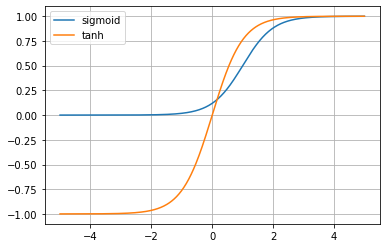

In [8]:
# %load solutions/sigmoid.py

# The smaller the `a`, the sharper the function is. 
# Variable `c` moves the function along the x axis 
def sigmoid(x,c,a):
    z = ((x-c)/a)
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 5.0, 500) # input points
c = 1.
a = 0.5
plt.plot(x, sigmoid(x, c, a), label='sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.grid();
plt.legend();

<div class="exercise"><b>2. In class exercise: Approximate a Gaussian function using a node and manually adjusting the weights. Start with one layer with one node and move to two nodes.</b></div>

The task is to approximate (learn) a function $f\left(x\right)$ given some input $x$.  For demonstration purposes, the function we will try to learn is a Gaussian function: 
\begin{align}
f\left(x\right) = e^{-x^{2}}
\textrm{}
\end{align}

Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.  

#### 2.1 Start by plotting the above function using the $x$ dataset you created earlier

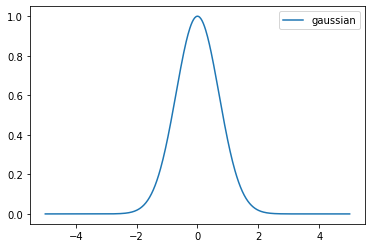

In [9]:
x = np.linspace(-5.0, 5.0, 500) # input points
def gaussian(x):
    return np.exp(-x*x) 

f = gaussian(x)
plt.plot(x, f, label='gaussian')
plt.legend()

In [10]:
f.shape

(500,)

#### 2.2 Now, let's code the single node as per the image above. 

Write a function named `affine` that does the transformation. The definition is provided below. Then create a simpler sigmoid with just one variable. We choose a **sigmoid** activation function and specifically the **logistic** function.  Sigmoids are a family of functions and the logistic function is just one member in that family. $$\sigma\left(z\right) = \dfrac{1}{1 + e^{-z}}.$$ <br> 

Define both functions in code. 

In [11]:
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: An array representing the weight of the perceptron
    b: An array representing the biases of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z

In [12]:
# your code here


In [11]:
# %load solutions/affine-sigmoid.py
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

And now we plot the activation function and the true function. What do you think will happen if you change $w$ and $b$?

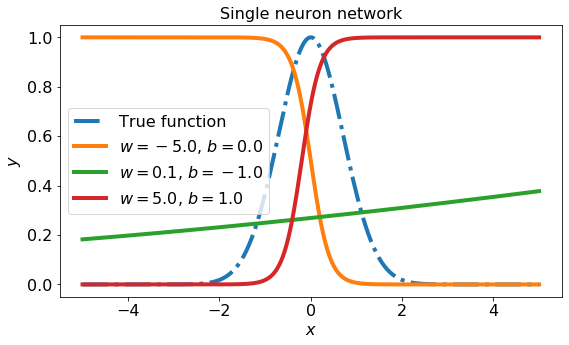

In [12]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(9,5))
SIZE = 16

# plot our true function, the gaussian
ax.plot(x, f, lw=4, ls='-.', label='True function')

# plot 3 "networks"
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi,bi))
    
ax.set_title('Single neuron network', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

Let's try to make our network more flexible by using **more nodes**!

### Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of nodes/neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting layers next to each other.  The other option is to stack neurons on top of each other in the same layer.  Now the network has some width, but is still only one layer deep.

In [13]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = sigmoid(z1)
h2 = sigmoid(z2)

Now let's plot things and see what they look like.

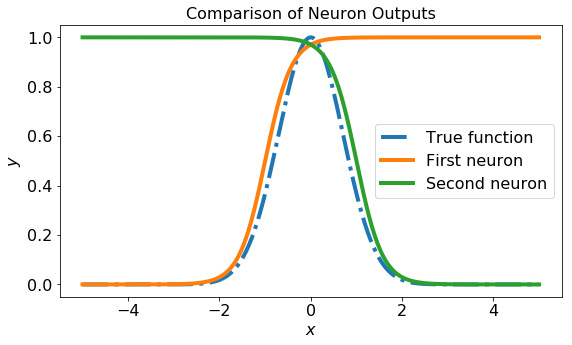

In [16]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Just as we expected.  Some sigmoids.  Of course, to get the network prediction we must combine these two sigmoid curves somehow.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

#### Note
We are **not** doing classification here.  We are trying to predict an actual function.  The sigmoid activation is convenient when doing classification because you need to go from $0$ to $1$.  However, when learning a function, we don't have as good of a reason to choose a sigmoid.

In [14]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = -1 # bias
yout = wout[0] * h1 + wout[1] * h2 + bout

And plot.

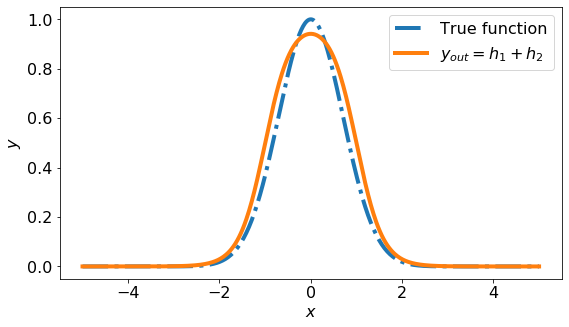

In [15]:
fig, ax = plt.subplots(1,1, figsize=(9,5))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

We can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

#### We will leave this simple example for some other time! Let's move on to fashion items!

## Part 2: Tensors, Fashion, and Reese Witherspoon

We can think of tensors as multidimensional arrays of real numerical values; their job is to generalize matrices to multiple dimensions. While tensors first emerged in the 20th century, they have since been applied to numerous other disciplines, including machine learning. Tensor decomposition/factorization can solve, among other, problems in unsupervised learning settings, temporal and multirelational data. For those of you that will get to handle images for Convolutional Neural Networks, it's a good idea to have the understanding of tensors of rank 3.

We will use the following naming conventions:

- scalar = just a number = rank 0 tensor  ($a$ ∈ $F$,)
<BR><BR>
- vector = 1D array = rank 1 tensor ( $x = (\;x_1,...,x_i\;)⊤$ ∈ $F^n$ )
<BR><BR>
- matrix = 2D array = rank 2 tensor ( $\textbf{X} = [a_{ij}] ∈ F^{m×n}$ )
<BR><BR>
- 3D array = rank 3 tensor ( $\mathscr{X} =[t_{i,j,k}]∈F^{m×n×l}$ )
<BR><BR>
- $\mathscr{N}$D array = rank $\mathscr{N}$ tensor ( $\mathscr{T} =[t_{i1},...,t_{i\mathscr{N}}]∈F^{n_1×...×n_\mathscr{N}}$ ) <-- Things start to get complicated here...
    

#### Tensor indexing
We can create subarrays by fixing some of the given tensor’s indices. We can create a vector by fixing all but one index. A 2D matrix is created when fixing all but two indices. For example, for a third order tensor the vectors are
<br><BR>
$\mathscr{X}[:,j,k]$ = $\mathscr{X}[j,k]$ (column), <br>
$\mathscr{X}[i,:,k]$ = $\mathscr{X}[i,k]$ (row), and <BR>
$\mathscr{X}[i,j,:]$ = $\mathscr{X}[i,j]$ (tube) <BR>
 
#### Tensor multiplication
We can multiply one matrix with another as long as the sizes are compatible ((n × m) × (m × p) = n × p), and also multiply an entire matrix by a constant. Numpy `numpy.dot` performs a matrix multiplication which is straightforward when we have 2D or 1D arrays. But what about > 3D arrays? The function will choose according to the matching dimentions but if we want to choose we should use `tensordot`, but, again, we **do not need tensordot** for this class. 

### Reese Witherspoon

This image is from the dataset [Labeled Faces in the Wild](http://vis-www.cs.umass.edu/lfw/person/Reese_Witherspoon.html) used for machine learning training. Images are 24-bit RGB images (height, width, channels) with 8 bits for each of R, G, B channel. Explore and print the array.

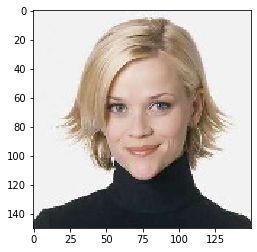

In [16]:
# load and show the image
FILE = '../fig/Reese_Witherspoon.jpg'
img = mpimg.imread(FILE)
imgplot = plt.imshow(img)

In [17]:
print(f'The image is a: {type(img)} of shape {img.shape}')
img[3:5, 3:5, :]

The image is a: <class 'numpy.ndarray'> of shape (150, 150, 3)


array([[[241, 241, 241],
        [242, 242, 242]],

       [[241, 241, 241],
        [242, 242, 242]]], dtype=uint8)

#### Slicing tensors: slice along each axis

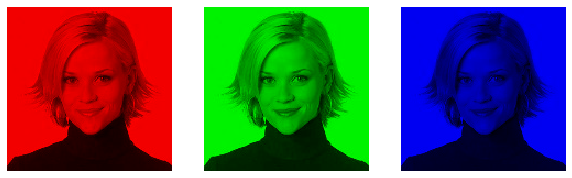

In [18]:
# we want to show each color channel
fig, axes = plt.subplots(1, 3, figsize=(10,10))
for i, subplot in zip(range(3), axes):
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()
plt.show()

#### Multiplying Images with a scalar (just for fun, does not really help us in any way)

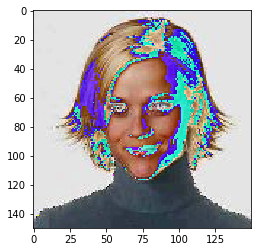

In [19]:
temp = img
temp = temp * 2
plt.imshow(temp)

For more on image manipulation by `matplotlib` see: [matplotlib-images](https://matplotlib.org/3.1.1/tutorials/introductory/images.html)

### Anatomy of an Artificial Neural Network

In Part 1 we hand-made a neural network by writing some simple python functions.  We focused on a regression problem where we tried to learn a function. We practiced using the logistic activation function in a network with multiple nodes, but a single or two hidden layers.  Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths. 

### ![](../fig/keras.png)
https://www.tensorflow.org/guide/keras

`tf.keras` is TensorFlow's high-level API for building and training deep learning models. It's used for fast prototyping, state-of-the-art research, and production. `Keras` is a library created by François Chollet. After Google released Tensorflow 2.0, the creators of `keras` recommend that "Keras users who use multi-backend Keras with the TensorFlow backend switch to `tf.keras` in TensorFlow 2.0. `tf.keras` is better maintained and has better integration with TensorFlow features".

#### IMPORTANT:  In `Keras` everything starts with a Tensor of N samples as input and ends with a Tensor of N samples as output.

### The 3 parts of an ANN

- **Part 1: the input layer** (our dataset)
- **Part 2: the internal architecture or hidden layers** (the number of layers, the activation functions, the learnable parameters and other hyperparameters)
- **Part 3: the output layer** (what we want from the network)

In the rest of the lab we will practice with end-to-end neural network training

1. Load the data 
2. Define the layers of the model.
3. Compile the model.
4. Fit the model to the train set (also using a validation set).
5. Evaluate the model on the test set.
6. Plot metrics such as accuracy.
7. Predict on random images from test set.
8. Predict on  a random image from the web!

In [20]:
seed = 7
np.random.seed(seed)

### Fashion MNIST 

![](../fig/drosophila.png)

MNIST, the set of handwritten digits is considered the Drosophila of Machine Learning. It has been overused, though, so we will try a slight modification to it.

**Fashion-MNIST** is a dataset of clothing article images (created by [Zalando](https://github.com/zalandoresearch/fashion-mnist)), consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a **28 x 28** grayscale image, associated with a label from **10 classes**. The creators intend Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. Each pixel is 8 bits so its value ranges from 0 to 255.

Let's load and look at it!

#### 1. Load the data

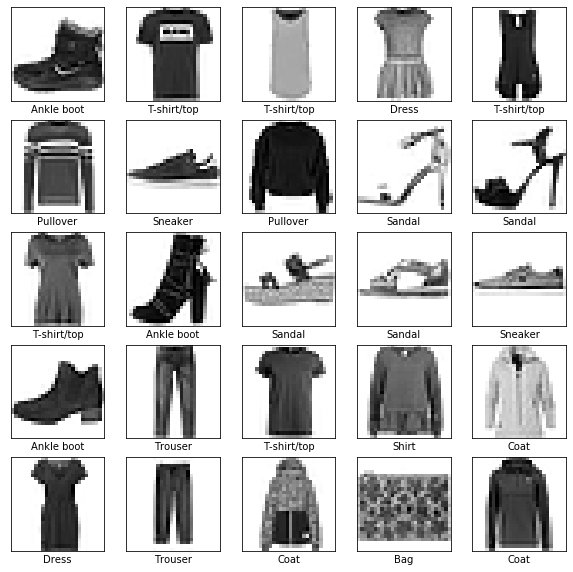

CPU times: user 1.55 s, sys: 350 ms, total: 1.9 s
Wall time: 2.23 s


In [21]:
%%time
# get the data from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

# load the data splitted in train and test! how nice!
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

# normalize the data by dividing with pixel intensity
# (each pixel is 8 bits so its value ranges from 0 to 255)
x_train, x_test = x_train / 255.0, x_test / 255.0

# classes are named 0-9 so define names for plotting clarity
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

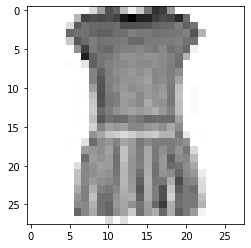

In [24]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [25]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
y_train.shape

(60000,)

#### 2. Define the layers of the model.

In [27]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(154, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

#### 3. Compile the model

In [28]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 154)               120890    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9920      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 131,460
Trainable params: 131,460
Non-trainable params: 0
_________________________________________________________________


In [30]:
tf.keras.utils.plot_model(
    model,
    #to_file='model.png', # if you want to save the image
    show_shapes=True, # True for more details than you need
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96
)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


[Everything you wanted to know about a Keras Model and were afraid to ask](https://www.tensorflow.org/api_docs/python/tf/keras/Model)

#### 4. Fit the model to the train set (also using a validation set)

This is the part that takes the longest.

-----------------------------------------------------------
**ep·och** <BR>
noun: epoch; plural noun: epochs. A period of time in history or a person's life, typically one marked by notable events or particular characteristics. Examples: "the Victorian epoch", "my Neural Netwok's epochs". <BR>
    
-----------------------------------------------------------

In [32]:
%%time

# the core of the network training
history = model.fit(x_train, y_train, validation_split=0.33, epochs=50, 
                    verbose=2)

Train on 40199 samples, validate on 19801 samples
Epoch 1/50
40199/40199 - 3s - loss: 0.5789 - accuracy: 0.7983 - val_loss: 0.4458 - val_accuracy: 0.8378
Epoch 2/50
40199/40199 - 3s - loss: 0.4177 - accuracy: 0.8497 - val_loss: 0.3876 - val_accuracy: 0.8627
Epoch 3/50
40199/40199 - 3s - loss: 0.3752 - accuracy: 0.8632 - val_loss: 0.3866 - val_accuracy: 0.8580
Epoch 4/50
40199/40199 - 3s - loss: 0.3451 - accuracy: 0.8735 - val_loss: 0.3499 - val_accuracy: 0.8716
Epoch 5/50
40199/40199 - 3s - loss: 0.3289 - accuracy: 0.8778 - val_loss: 0.3315 - val_accuracy: 0.8811
Epoch 6/50
40199/40199 - 3s - loss: 0.3117 - accuracy: 0.8840 - val_loss: 0.3352 - val_accuracy: 0.8795
Epoch 7/50
40199/40199 - 3s - loss: 0.2984 - accuracy: 0.8887 - val_loss: 0.3319 - val_accuracy: 0.8827
Epoch 8/50
40199/40199 - 3s - loss: 0.2852 - accuracy: 0.8938 - val_loss: 0.3250 - val_accuracy: 0.8871
Epoch 9/50
40199/40199 - 3s - loss: 0.2749 - accuracy: 0.8972 - val_loss: 0.3265 - val_accuracy: 0.8834
Epoch 10/50
40

#### Save the model

You can save the model so you do not have `.fit` everytime you reset the kernel in the notebook. Network training is expensive!

For more details on this see [https://www.tensorflow.org/guide/keras/save_and_serialize](https://www.tensorflow.org/guide/keras/save_and_serialize)

In [33]:
# save the model so you do not have to run the code everytime
model.save('fashion_model.h5')

# Recreate the exact same model purely from the file
#model = tf.keras.models.load_model('fashion_model.h5')

#### 5. Evaluate the model on the test set.

In [34]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy={test_accuracy}')

Test accuracy=0.8866999745368958


#### 6. We learn a lot by studying History! Plot metrics such as accuracy. 

You can learn a lot about neural networks by observing how they perform while training. You can issue `kallbacks` in `keras`. The networks's performance is stored in a `keras` callback aptly named `history` which can be plotted. 

In [35]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


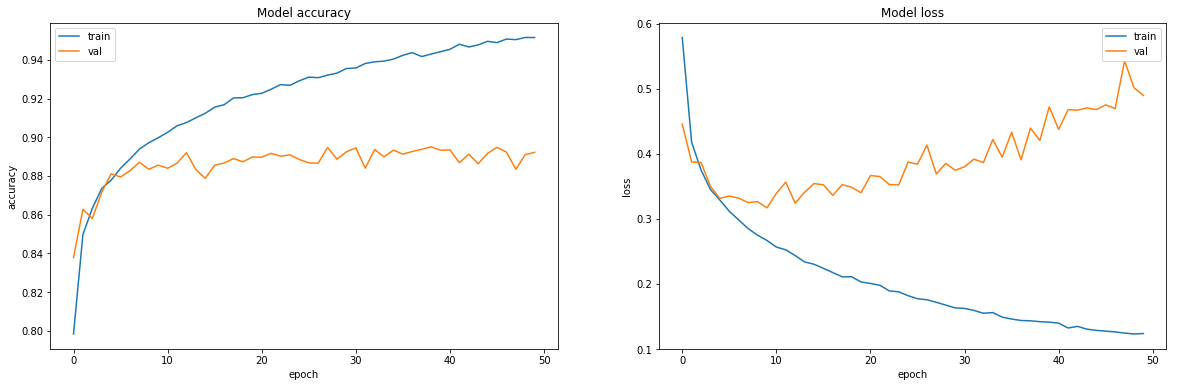

In [36]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

#### 7. Now let's use the Network for what it was meant to do: Predict!

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[0]

array([6.1009703e-14, 2.4943817e-17, 1.8483500e-17, 4.5710222e-09,
       5.6084262e-19, 6.3962293e-09, 7.5077032e-13, 1.6745391e-05,
       4.4780979e-13, 9.9998319e-01], dtype=float32)

In [39]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

(9, 'Ankle boot')

Let's see if our network predicted right! Is the first item what was predicted?

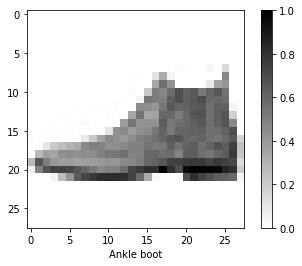

In [40]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])
plt.colorbar()

**Correct!!** Now let's see how confident our model is by plotting the probability values:

In [41]:
# code source: https://www.tensorflow.org/tutorials/keras/classification
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

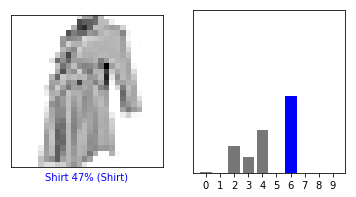

In [42]:
i = 406
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

#### 8. Predicting in the real world

Let's see if our network can generalize beyond the MNIST fashion dataset. Let's give it an random googled image of a boot. Does it have to be a clothing item resembling the MNIST fashion dataset? Can it be a puppy?

Download an image from the internet and resize it to 28x28. 

`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list: